# Test Time Augmentation

In this notebook we will impement **TTA**

>TTA refers to cropping of test(or validation) images at inference and averaging the result for a better generalization. 

In [1]:
from fastai.vision.all import *

path = untar_data(URLs.IMAGENETTE)

Function to crop corners of Image

In [13]:
def crop_image_5_ways(img, crop_size):
    "Function to crop an image into 5 regions: four corners and the center."
    w, h = img.size  # Get original image width and height

    # Calculate coordinates for the center crop
    center_x, center_y = (w - crop_size) // 2, (h - crop_size) // 2
    
    # Generate 5 crops: top-left, top-right, bottom-left, bottom-right, and center
    crops = [
        img.crop((0, 0, crop_size, crop_size)),  # Top-left
        img.crop((w - crop_size, 0, w, crop_size)),  # Top-right
        img.crop((0, h - crop_size, crop_size, h)),  # Bottom-left
        img.crop((w - crop_size, h - crop_size, w, h)),  # Bottom-right
        img.crop((center_x, center_y, center_x + crop_size, center_y + crop_size))  # Center
    ]
    
    return crops

In [18]:
import matplotlib.pyplot as plt

def visualize_crops(crops, figsize=(10, 5)):
    """
    Function to visualize the 5 crops returned by crop_image_5_ways.
    
    Parameters:
    - crops: List of 5 cropped images returned by the crop_image_5_ways function.
    - figsize: Tuple for the size of the figure.
    """
    # Create a subplot with 1 row and 5 columns
    fig, axs = plt.subplots(1, 5, figsize=figsize)

    # Titles for the crops
    titles = ['Top-Left', 'Top-Right', 'Bottom-Left', 'Bottom-Right', 'Center']

    for i, (crop, ax) in enumerate(zip(crops, axs)):
        ax.imshow(crop)
        ax.set_title(titles[i])
        ax.axis('off')  # Hide the axes for a cleaner look

    plt.tight_layout()
    plt.show()

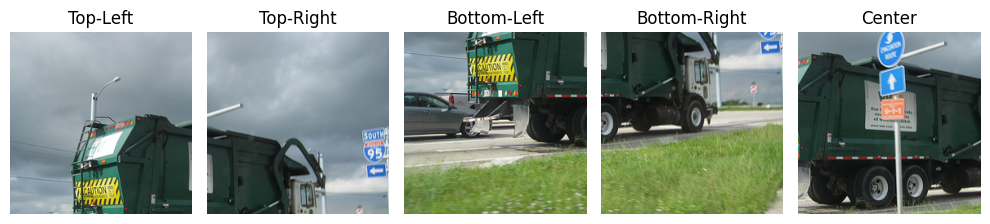

In [19]:
crops = crop_image_5_ways(im, 224)
visualize_crops(crops)

Custom `TTA` method

In [20]:
def custom_tta(model, img, crop_size):
    "Perform Test Time Augmentation by averaging predictions from 5 different crops."
    # Get the 5 cropped images
    crops = crop_image_5_ways(img, crop_size)
    
    # Make predictions for each crop
    preds = [model.predict(crop) for crop in crops]
    
    # Average the predictions
    avg_pred = sum(preds) / len(preds)
    
    return avg_pred

## Creating a learner

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(5)